# Evaluation of COSMO testruns with ERA5: bias maps

end-product: maps (COSMO, ERA5 and difference) for  variable and  metric 

In [1]:
import valenspy as vp
from valenspy.processing.regrid import remap_cdo
from valenspy.processing.select import select_region

from valenspy.diagnostic.visualizations import *

import warnings
import xarray as xr

# Turn off all warnings
warnings.filterwarnings('ignore')

### 0. Settings

In [6]:
# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'

experiment = "CB2_CCLM_BEL28_ERA5_evaluation"

File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_2008.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1994.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_2018.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1984.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1995.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_2013.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/dail

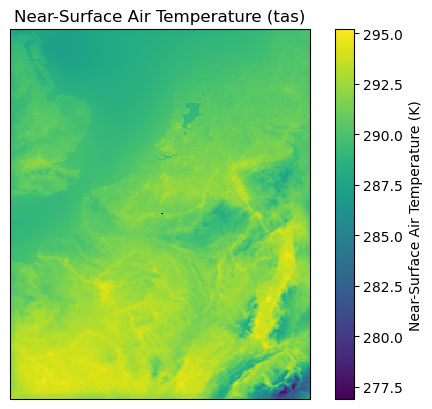

In [10]:
%%time

variable = 'tas'
months_to_analyse = [6,7,8]
vmin=275
vmax=305

# start up input manager
manager = vp.InputManager(machine=machine)


# ------------------------------
# 2. Load and regrid model data

# load data
ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "mean"])

# ------------------------------
# 3. Preprocessing: remapping and selection
    
# do spatial selection

da_mod = ds_mod[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))

da_mod = da_mod.mean('time')
da_mod.attrs['dataset'] = experiment

    
ax = plot_map(da_mod, ax=None, title=None, region=None)

